In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from PIL import Image
import os
import cv2

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
img_data = []
img_labels = []
total_class = 43
cur_path = os.getcwd()

In [3]:
# Label Overview
classes_name = { 
            0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' 
}

In [4]:
dataset_path = ('C:\\Users\\hp\\Desktop\\AI\\PORTFOLIO-II')
print(dataset_path)

C:\Users\hp\Desktop\AI\PORTFOLIO-II


## Dataset Visualization

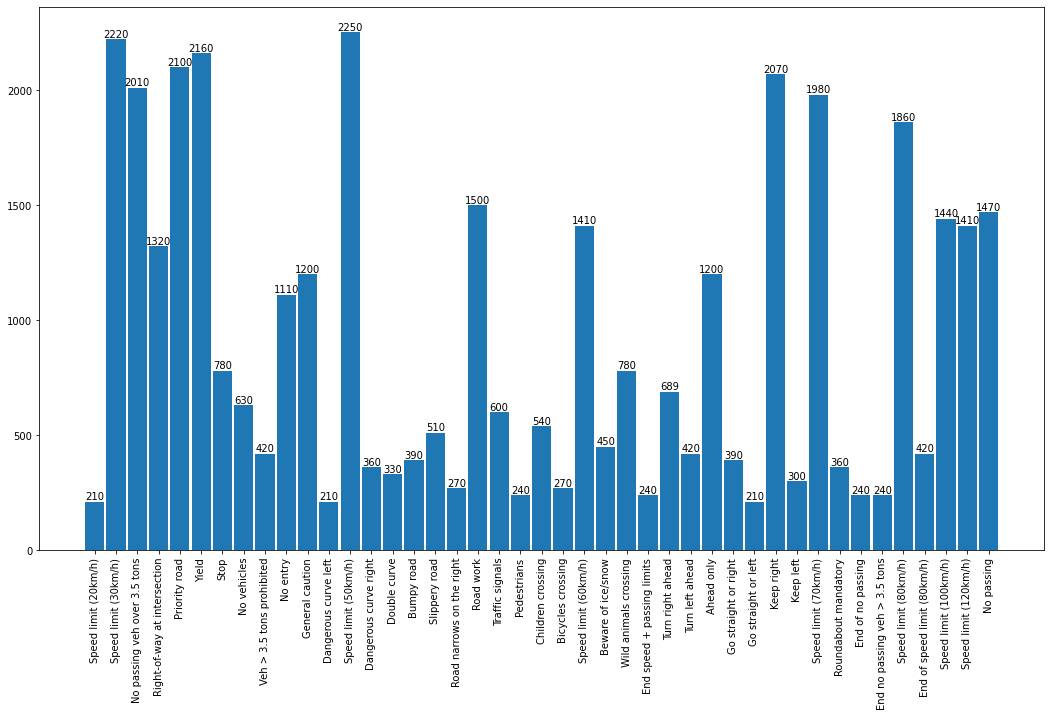

In [5]:
train_dataset_path= os.path.join(dataset_path,'Train')
train_img_folders = os.listdir(train_dataset_path)
train_img_num = []
class_num = []
plt.rcParams['text.color'] = 'black'
for folder in train_img_folders:
    train_file = os.path.join(dataset_path,'Train',str(folder))
    train_files = os.listdir(train_file)
    train_img_num.append(len(train_files))
    class_num.append(classes_name[int(folder)])

# Plotting the number of images in each class
plt.figure(figsize=(18,10))  
plt.bar(class_num, train_img_num, width=0.9)
plt.xticks(class_num, rotation='vertical')
for i in range(0,len(class_num)):
    plt.text(i,train_img_num[i],train_img_num[i], ha ="center", va = "bottom")
plt.show()


As can be seen from the bar graph, the training data for "Speed limit 50 km/h" has the most values (2250), followed by "Speed limit 30 km/h," and so on. The Convolution Neural Network was utilized to classify traffic sign detection using these data. 

## Image preprocessing and Displaying 

Above code, count the total number of classes and total number of images in each class. Also plot the graph

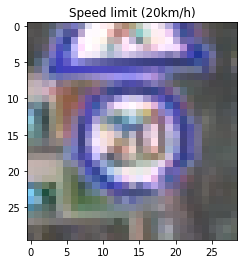

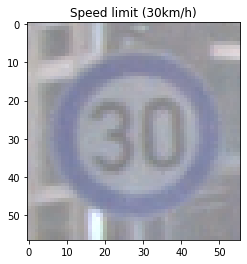

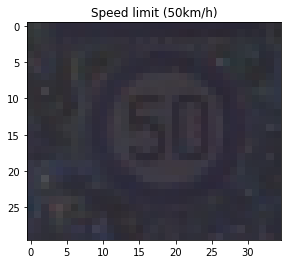

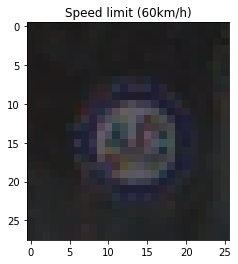

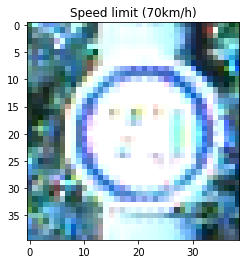

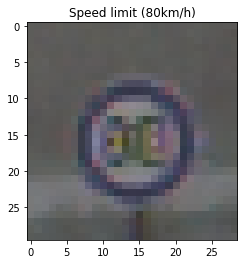

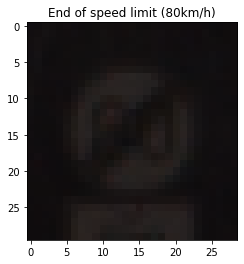

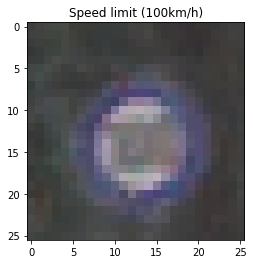

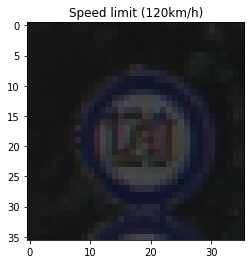

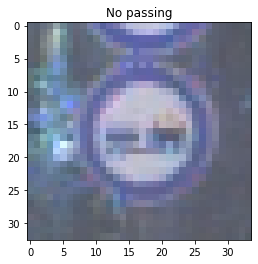

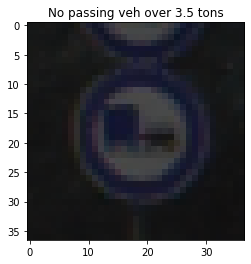

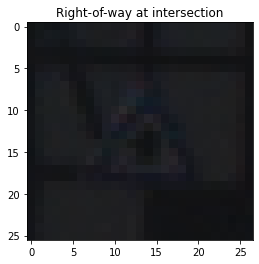

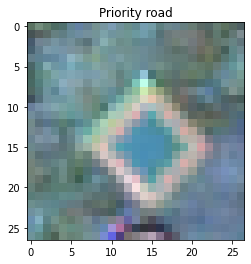

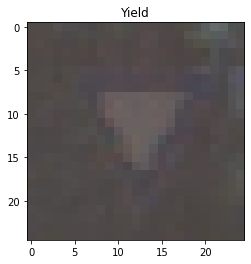

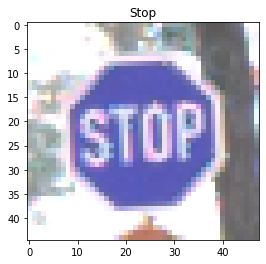

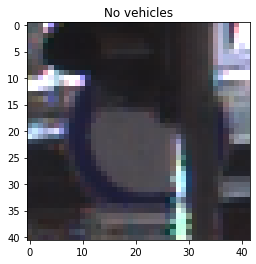

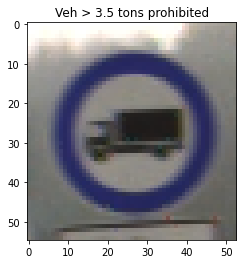

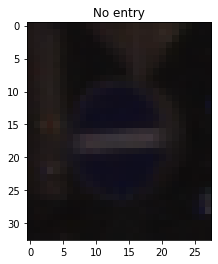

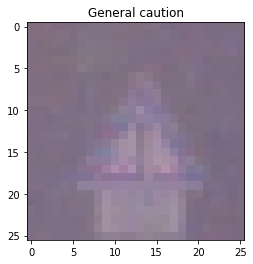

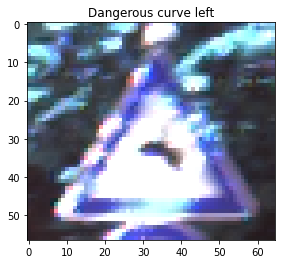

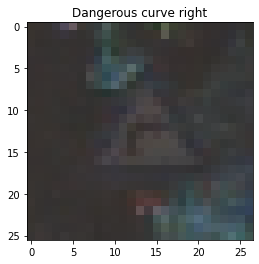

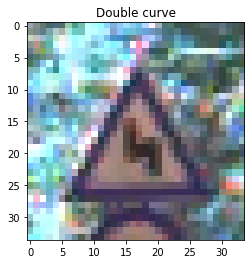

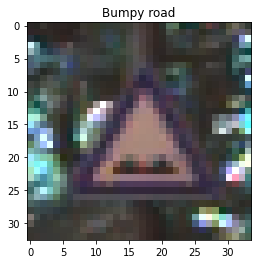

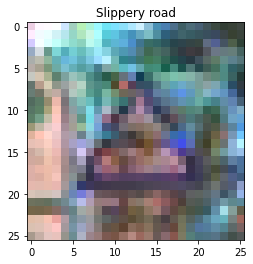

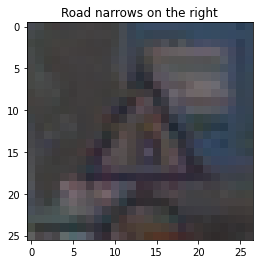

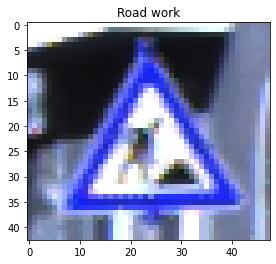

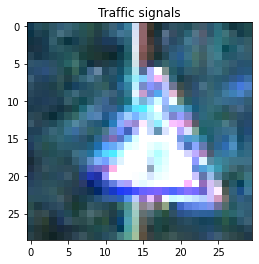

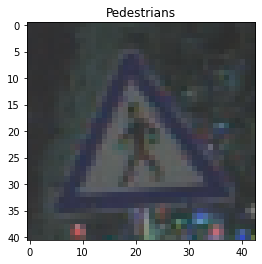

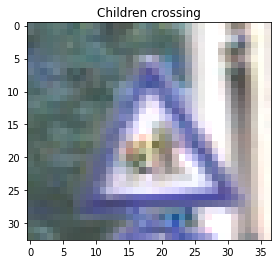

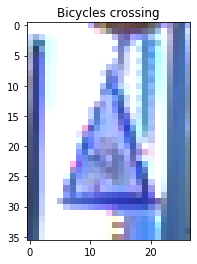

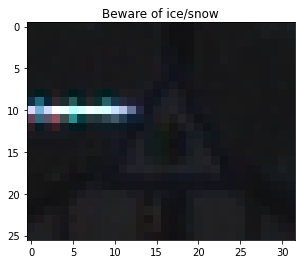

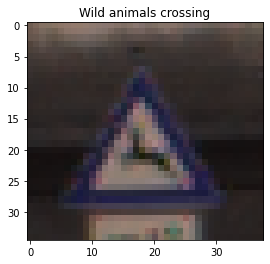

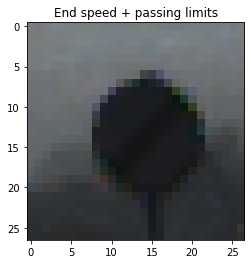

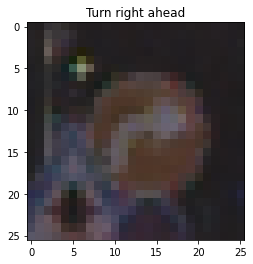

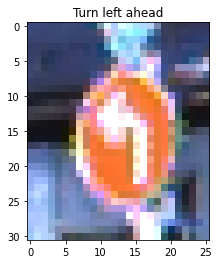

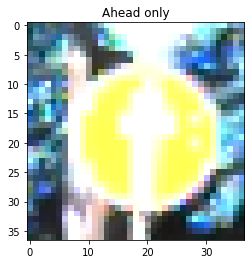

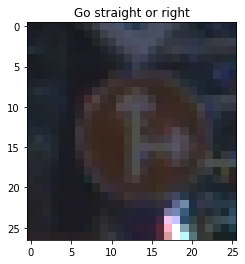

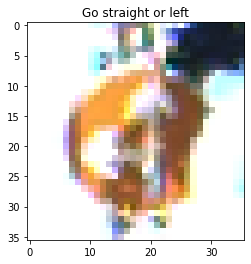

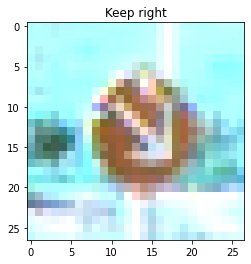

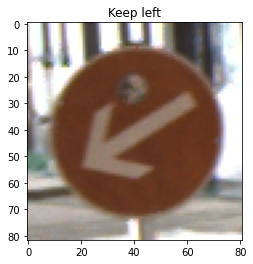

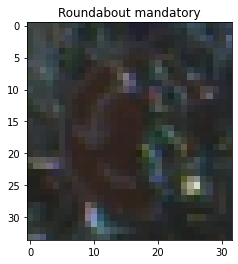

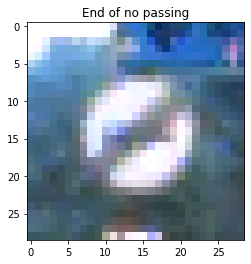

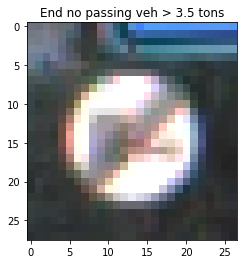

In [6]:
for i in range(total_class):
    path = os.path.join(dataset_path,'Train',str(i))
    images = os.listdir(path)
    t=0
    for img in images:
        try:
            image = cv2.imread(os.path.join(path,img))
            if(t==0):
                plt.title(classes_name[i])
                plt.imshow(image)
                plt.show()
            t=1
            grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image_from_array = Image.fromarray(grayImage,'L')
            resized_image = image_from_array.resize((30,30))
            img_data.append(np.array(resized_image))
            img_labels.append(i)
        
        except:
            print('Error loading image')

Above code reads the every images of each classes and append the image data in a list as well as image label in different list. Before appending, RGB image is converted into Grayscale and into size of 30x30, and finally into numpy array. Above code also print a image of every classes.

In [7]:
print("Total number of images are: ", len(img_data))
print("total number of classes: ", len(class_num))
print("\n")
for i in range(len(class_num)):
    print(class_num[i], " has ",train_img_num[i]," images.")

Total number of images are:  39209
total number of classes:  43


Speed limit (20km/h)  has  210  images.
Speed limit (30km/h)  has  2220  images.
No passing veh over 3.5 tons  has  2010  images.
Right-of-way at intersection  has  1320  images.
Priority road  has  2100  images.
Yield  has  2160  images.
Stop  has  780  images.
No vehicles  has  630  images.
Veh > 3.5 tons prohibited  has  420  images.
No entry  has  1110  images.
General caution  has  1200  images.
Dangerous curve left  has  210  images.
Speed limit (50km/h)  has  2250  images.
Dangerous curve right  has  360  images.
Double curve  has  330  images.
Bumpy road  has  390  images.
Slippery road  has  510  images.
Road narrows on the right  has  270  images.
Road work  has  1500  images.
Traffic signals  has  600  images.
Pedestrians  has  240  images.
Children crossing  has  540  images.
Bicycles crossing  has  270  images.
Speed limit (60km/h)  has  1410  images.
Beware of ice/snow  has  450  images.
Wild animals crossi

In [8]:
#converting list into numpy array
img_data_array = np.array(img_data)
img_labels_array = np.array(img_labels)

In [9]:
import pickle

pickle_out = open("img_data_gray.pickle", "wb")
pickle.dump(img_data_array, pickle_out)
pickle_out.close()

pickle_out = open("img_label_gray.pickle", "wb")
pickle.dump(img_labels_array, pickle_out)
pickle_out.close()

Above code export the image data and label data in pickle format.

## Dataset Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img_data_array, img_labels_array, test_size =0.2, random_state = 17)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30) (7842, 30, 30) (31367,) (7842,)


In [11]:
re_y_test = y_test

In [12]:
re_y_test.shape

(7842,)

In [13]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
y_test = to_categorical(y_test,43)
y_train = to_categorical(y_train,43)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 1) (7842, 30, 30, 1) (31367, 43) (7842, 43)


Above code reshape the dataset into appropriate shape that is suitable for the model

## Model Development

In [14]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(5,5), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(filters = 32, kernel_size=(5,5), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.25))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(43, activation = 'softmax'))

model.compile(Adam(learning_rate=0.001),loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
model.summary()            

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [16]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

In [17]:
fit_model = model.fit(aug.flow(X_train, y_train, batch_size = 64), epochs = 40, validation_data = (X_test, y_test))

Epoch 1/40
491/491 [==============================] - 85s 172ms/step - loss: 2.6251 - accuracy: 0.3276 - val_loss: 0.7101 - val_accuracy: 0.8183
Epoch 2/40
491/491 [==============================] - 72s 147ms/step - loss: 1.0963 - accuracy: 0.6883 - val_loss: 0.1914 - val_accuracy: 0.9518
Epoch 3/40
491/491 [==============================] - 78s 158ms/step - loss: 0.6393 - accuracy: 0.8116 - val_loss: 0.1214 - val_accuracy: 0.9695
Epoch 4/40
491/491 [==============================] - 78s 158ms/step - loss: 0.4660 - accuracy: 0.8620 - val_loss: 0.0867 - val_accuracy: 0.9769
Epoch 5/40
491/491 [==============================] - 66s 135ms/step - loss: 0.3776 - accuracy: 0.8894 - val_loss: 0.0622 - val_accuracy: 0.9807
Epoch 6/40
491/491 [==============================] - 62s 126ms/step - loss: 0.3200 - accuracy: 0.9064 - val_loss: 0.0463 - val_accuracy: 0.9860
Epoch 7/40
491/491 [==============================] - 62s 126ms/step - loss: 0.3082 - accuracy: 0.9114 - val_loss: 0.0311 - val_ac

Above code trains the model with training dataset with epochs = 40, model is trained with using ImageDataGenerator that augment the training images that promotes to more accurate training.

## Plotting traning accuracy and loss

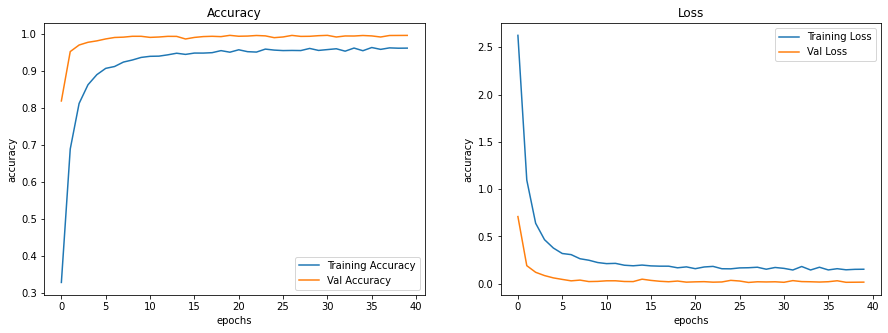

In [18]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
plt.plot(fit_model.history['accuracy'], label = 'Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], label = 'Val Accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(fit_model.history['loss'], label = 'Training Loss')
plt.plot(fit_model.history['val_loss'], label = 'Val Loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

Above code plots the training accuracy vs validation accuracy and training loss vs validation loss. It shows that there is extensive progress in both accuracy and loss.

### Testing model with test split dataset

In [19]:
pred = model.predict(X_test)

In [20]:
pred_class = np.argmax(pred, axis = 1)

In [21]:
from sklearn.metrics import accuracy_score
print('Test Data Accuracy: ', accuracy_score(re_y_test, pred_class)*100)

Test Data Accuracy:  99.55368528436624


## Testing Model with Test dataset

In [22]:
test_img_path = os.path.join(dataset_path,'Test')
test_img_names = os.listdir(test_img_path)

#### Preprocessing image with same method

In [23]:
test_img_data = []
for img in test_img_names:
    try:
        image = cv2.imread(os.path.join(test_img_path,img))
        grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image_array = Image.fromarray(grayImage,'L')
        resized_image = image_array.resize((30,30))
        test_img_data.append(np.array(resized_image))
    except:
        print('error: '+ img)

error: GT-final_test.csv


In [24]:
test_img_data_array = np.array(test_img_data)

In [25]:
test_img_data_array = test_img_data_array.reshape(test_img_data_array.shape[0], test_img_data_array.shape[1], test_img_data_array.shape[2], 1)

#### Predicting label of the test images

In [26]:
predict_label = model.predict(test_img_data_array)
predict_classes=np.argmax(predict_label,axis=1)
predict_classes

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [27]:
test_data_csv = pd.read_csv(os.path.join(dataset_path,'Test.csv'))
test_data_labels = test_data_csv['ClassId'].values

In [28]:
from sklearn.metrics import accuracy_score
print('Test Data Accuracy: ', accuracy_score(test_data_labels, predict_classes)*100)

Test Data Accuracy:  97.56927949326999


## Confusion Matrix Plot

In [29]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(test_data_labels, predict_classes)

<AxesSubplot:>

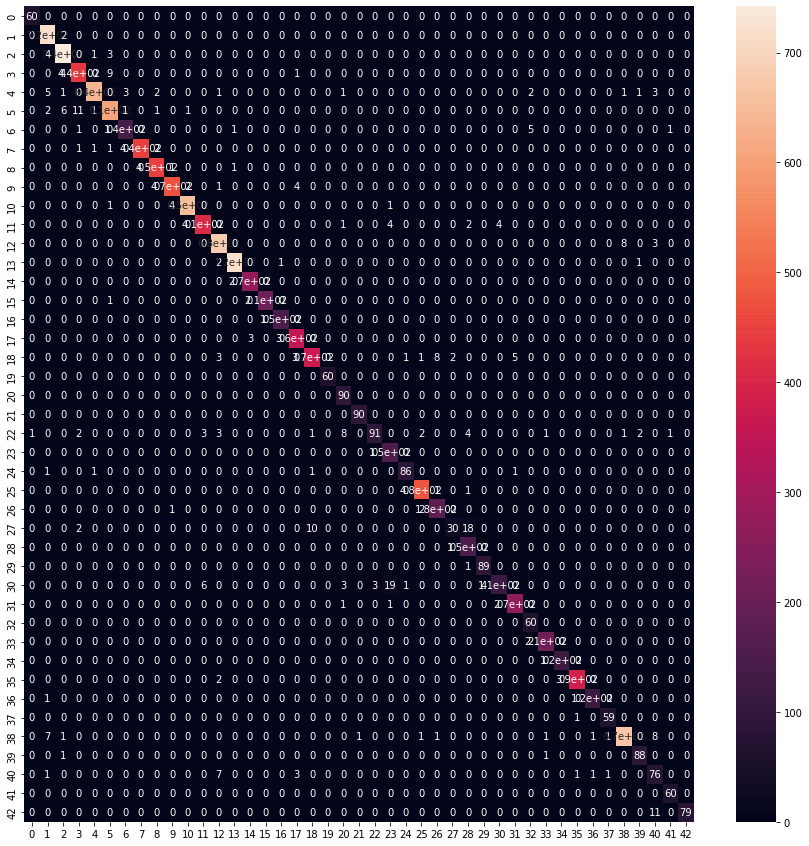

In [30]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes_name,columns = classes_name)
plt.figure(figsize = (15,15))
sns.heatmap(df_cm, annot = True)

## Classification Report

In [31]:
from sklearn.metrics import classification_report, roc_curve
print(classification_report(test_data_labels, predict_classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.97      1.00      0.98       720
           2       0.98      0.99      0.98       750
           3       0.96      0.97      0.97       450
           4       0.99      0.97      0.98       660
           5       0.98      0.96      0.97       630
           6       0.97      0.95      0.96       150
           7       1.00      0.99      0.99       450
           8       0.99      1.00      0.99       450
           9       0.99      0.99      0.99       480
          10       1.00      0.99      0.99       660
          11       0.98      0.97      0.98       420
          12       0.97      0.98      0.98       690
          13       1.00      0.99      1.00       720
          14       0.99      1.00      0.99       270
          15       1.00      1.00      1.00       210
          16       0.99      1.00      1.00       150
          17       0.98    

IN above classification report, only label 21, 27, 30, 41 and 40 have less than 90 f1 score

## Plotting 25 image with acutal label and predicted label

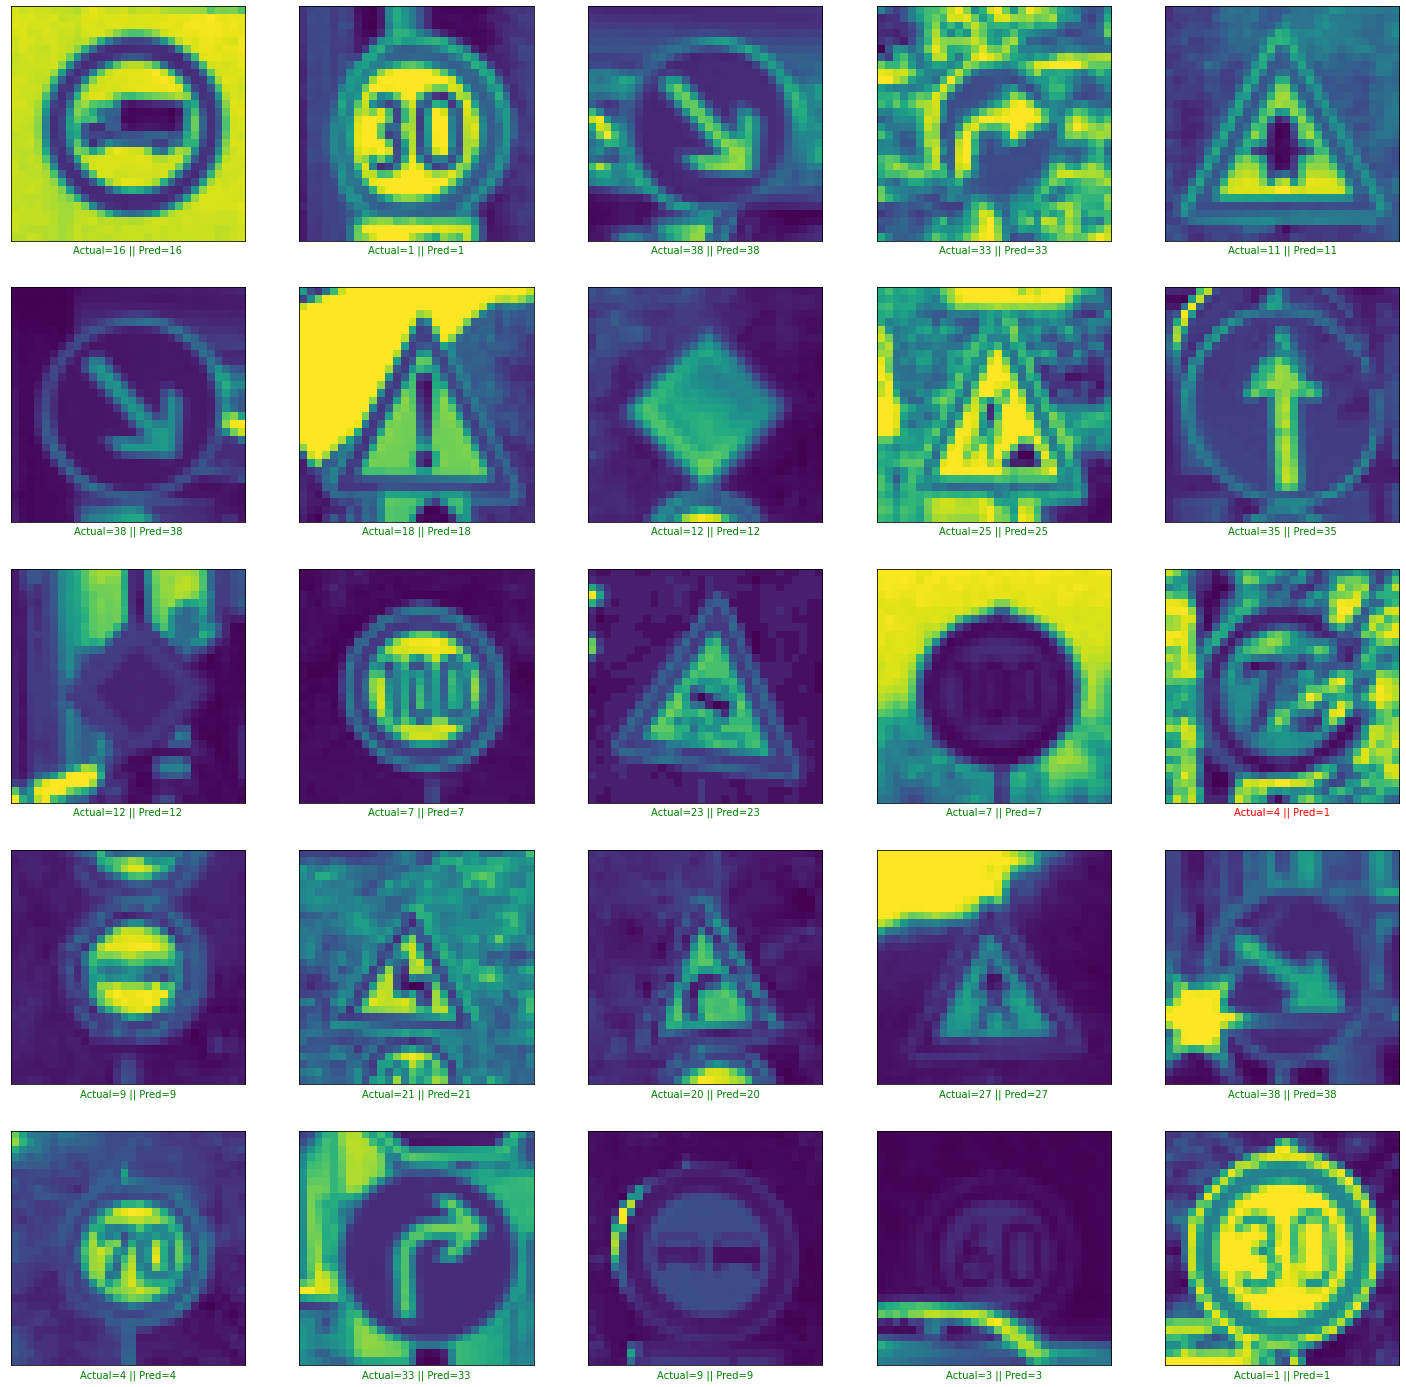

In [32]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    prediction = predict_classes[start_index + i]
    pred_name = classes_name[prediction]
    actual = test_data_labels[start_index + i]
    actual_name = classes_name[actual]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(test_img_data[start_index + i])
plt.show()

Above code prints the image with its  acutal label and predicted label. if the predicted label is correct it prints in green and if the predicted is incorrect, it prints in red color.

### Predicting External Image

In [33]:
im = cv2.imread('C:\\Users\\hp\\Desktop\\AI\\PORTFOLIO-II\\sign.jpg')
grayImage = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
image_from_array = Image.fromarray(grayImage,'L')
resized_im = image_from_array.resize((30,30))
test_img =[]
test_img.append(np.array(resized_im))
img = np.array(test_img)
img = img.reshape(img.shape[0],img.shape[1],img.shape[2],1)

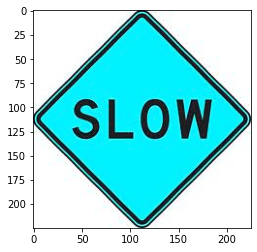

In [34]:
plt.imshow(im)

In [35]:
pred = model.predict(img)
class_pred =np.argmax(pred,axis=1)
classes_name[class_pred[0]]

'Veh > 3.5 tons prohibited'

Above code preprocess the image as same as training images and prints the predicted label. model predicts the sign correctly.

## Exporting the model in H5 format

In [36]:
model.save('sign_classifier.h5')